In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.optimize import curve_fit
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from scipy.stats import kurtosis, skew
from sklearn.metrics import silhouette_score


In [17]:
dff = pd.read_csv("World Energy Consumption.csv")
dff.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [18]:
#choose the columns
selected_columns=['solar_consumption', 'wind_consumption', 'biofuel_consumption', 'hydro_consumption', 'year', 'population']
column_dff=dff[selected_columns]
column_dff.head() #head() display the first few rows

,solar_consumption,wind_consumption,biofuel_consumption,hydro_consumption,year,population
0,NaN,NaN,NaN,NaN,2000,NaN
1,NaN,NaN,NaN,NaN,2001,NaN
2,NaN,NaN,NaN,NaN,2002,NaN
3,NaN,NaN,NaN,NaN,2003,NaN
4,NaN,NaN,NaN,NaN,2004,NaN


In [19]:
selected_columns=['solar_consumption', 'wind_consumption', 'biofuel_consumption', 'hydro_consumption', 'year', 'population']
df = dff[selected_columns].copy()  # Create a copy to avoid SettingWithCopyWarning

# Drop rows with missing values
df.dropna(inplace=True)

# Drop columns with missing values
df.dropna(axis=1, inplace=True)

# Display the cleaned DataFrame
df.head() #head() display the first few rows

,solar_consumption,wind_consumption,biofuel_consumption,hydro_consumption,year,population
235,0.0,0.000,0.0,169.301,1990,638157571.0
236,0.0,0.000,0.0,179.346,1991,655040869.0
237,0.0,0.000,0.0,171.092,1992,671931834.0
238,0.0,0.006,0.0,167.610,1993,689140286.0
239,0.0,0.016,0.0,170.311,1994,706488557.0


In [20]:
# Calculate the statistical measures for each type of energy
energy_types = ['solar_consumption', 'wind_consumption', 'biofuel_consumption', 'hydro_consumption', 'year', 'population' ]
results = {}

for energy in energy_types:
    data = df[energy]  # Extract the data for each type of energy
    results[energy] = {
        'Mean': data.mean(),
        'Median': data.median(),
        'Standard Deviation': data.std(),
        'Kurtosis': kurtosis(data),
        'Skewness': skew(data)
    }

# Convert the results to a DataFrame for better visualization and print it
results_df = pd.DataFrame(results).T  # Transpose to view each energy type as a row
print(results_df)


                             Mean        Median  Standard Deviation  \
solar_consumption    3.082654e+01  2.700000e-02        1.712459e+02   
wind_consumption     7.815991e+01  4.790000e-01        3.347587e+02   
biofuel_consumption  3.188405e+01  7.035000e-01        1.066028e+02   
hydro_consumption    6.512343e+02  5.628250e+01        1.451780e+03   
year                 2.003459e+03  2.006000e+03        1.365042e+01   
population           4.779298e+08  3.852167e+07        1.142986e+09   

                       Kurtosis   Skewness  
solar_consumption    145.132948  10.549094  
wind_consumption      85.486149   8.031776  
biofuel_consumption   43.083033   5.887040  
hydro_consumption     18.363753   3.855303  
year                   0.013502  -0.792933  
population            14.721768   3.634980  


In [21]:
def aggregate_renewable_consumption(df):
    """
    Aggregates solar, wind, biofuel, and hydro consumption by year.
    """
    grouped_data = df.groupby('year')[['solar_consumption', 'wind_consumption', 'biofuel_consumption', 'hydro_consumption']].sum()
    grouped_data['total_renewable_consumption'] = grouped_data.sum(axis=1)
    return grouped_data.reset_index()

def filter_data_by_year(data, start_year, end_year):
    """
    Filters the DataFrame for the specified range of years..
    
    """
    return data[(data['year'] >= start_year) & (data['year'] <= end_year)]

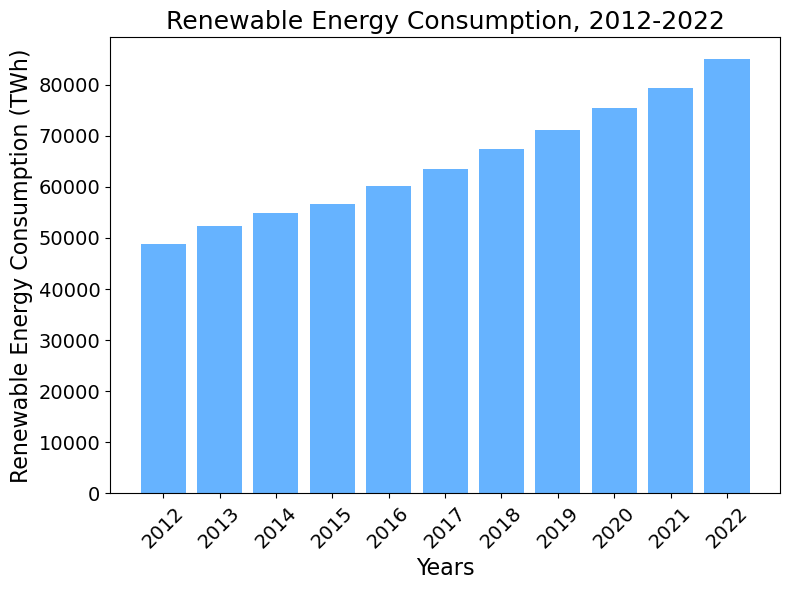

In [22]:
def plot_renewable_consumption(data):
    """
    Plots the renewable energy consumption from a filtered DataFrame.
    """
    plt.figure(figsize=(8, 6))
    plt.bar(data['year'], data['total_renewable_consumption'], color='#66b3ff', linestyle='-')
    plt.title('Renewable Energy Consumption, 2012-2022', fontsize=18)
    plt.xlabel('Years', fontsize=16)
    plt.ylabel('Renewable Energy Consumption (TWh)', fontsize=16)
    plt.xticks(data['year'], rotation=45, fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.show()

renewable_energy = aggregate_renewable_consumption(df)
filtered_data = filter_data_by_year(renewable_energy, 2012, 2022)
plot_renewable_consumption(filtered_data)


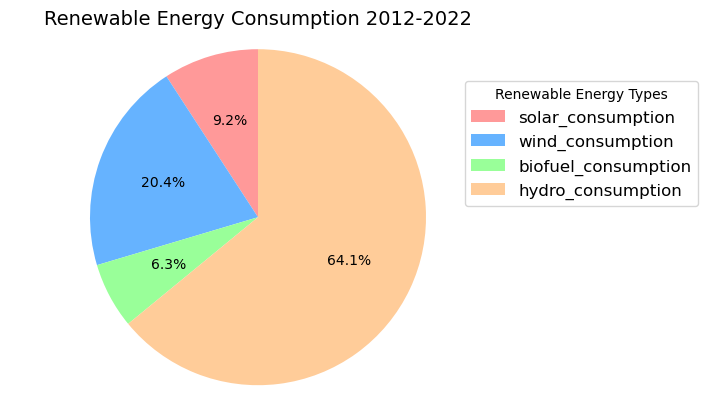

In [23]:
def plot_renewable_energy_consumption(df, start_year, end_year):
    """
    Filters the DataFrame for specified years and plots a pie chart of the renewable energy consumption.
    """
    # Filter the DataFrame for the given range of years
    data = df[(df['year'] >= start_year) & (df['year'] <= end_year)]

    # Summing up the renewable energy consumption
    renewable_energy_totals = data[['solar_consumption', 'wind_consumption', 'biofuel_consumption', 'hydro_consumption']].sum()

    # Choosing nice colors for the pie chart
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

    # Plotting the pie chart
    fig, ax = plt.subplots()
    ax.pie(renewable_energy_totals, labels=None, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Adding a title to the chart
    plt.title(f'Renewable Energy Consumption {start_year}-{end_year}', fontsize=14)

    # Adding a legend outside the pie chart to identify the renewable energy types
    plt.legend(renewable_energy_totals.index, title="Renewable Energy Types", loc="center left", bbox_to_anchor=(0.9, 0.7), fontsize='large')

    plt.show()

plot_renewable_energy_consumption(df, 2012, 2022)


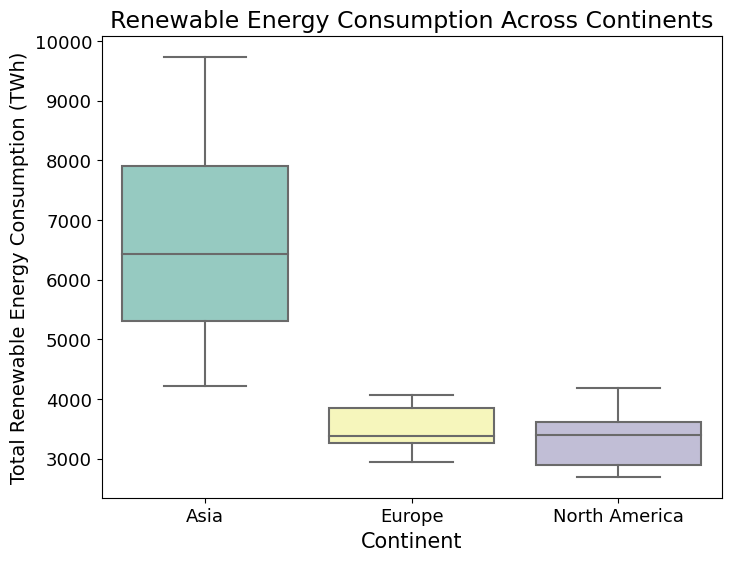

In [24]:
def plot_renewable_energy_by_continent(dff):
    """
    Filters data for specific years and continents, aggregates it, and plots the total renewable energy consumption.
    """
    # Sum the renewable energy types to get the total renewable energy consumption
    dff['total_renewable_consumption'] = dff[['solar_consumption', 'wind_consumption', 'biofuel_consumption', 'hydro_consumption']].sum(axis=1)

    # Filter the dataframe for the years 2012 to 2022 and for the continents of interest
    data_continents = dff[(dff['year'] >= 2012) & (dff['year'] <= 2022) & (dff['country'].isin(['Asia', 'Europe', 'North America']))]

    # Group the data by continent and year and sum the total renewable consumption
    grouped_data = data_continents.groupby(['country', 'year']).agg({'total_renewable_consumption': 'sum'}).reset_index()

    # Create the boxplot for total renewable energy consumption by continent
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='country', y='total_renewable_consumption', data=grouped_data, palette='Set3')
    plt.xlabel('Continent', fontsize= 15)
    plt.ylabel('Total Renewable Energy Consumption (TWh)', fontsize= 14)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.title('Renewable Energy Consumption Across Continents', fontsize=17)
    plt.show()
plot_renewable_energy_by_continent(dff)


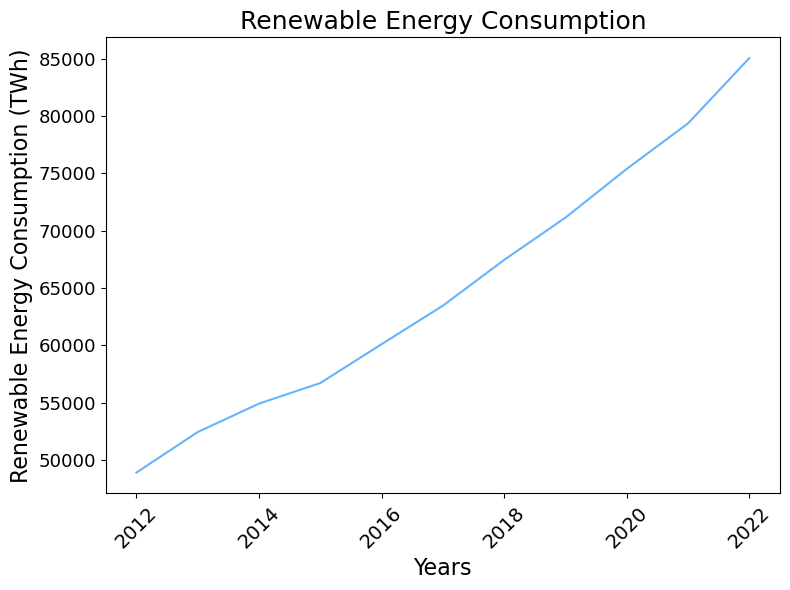

In [25]:

def plot_filtered_renewable_consumption(dataframe):
    """
    Filters the given DataFrame for specific years and plots the renewable energy consumption over those years.
    """
    # Filtering the dataset for the years 2012 to 2022
    filtered_data = dataframe[(dataframe['year'] >= 2012) & (dataframe['year'] <= 2022)]

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(filtered_data['year'], filtered_data['total_renewable_consumption'], color='#66b3ff', linestyle='-')
    plt.title('Renewable Energy Consumption', fontsize=18)
    plt.xlabel('Years', fontsize=16)
    plt.ylabel('Renewable Energy Consumption (TWh)', fontsize=16)
    plt.xticks(rotation=45, fontsize=14)
    plt.yticks(fontsize=13)
    plt.tight_layout()
    plt.show()
plot_filtered_renewable_consumption(renewable_energy)



In [26]:
def exponential(x, N0, growth):
    """
    Exponential growth model.
    """
    return N0 * np.exp(growth * x)

N0 = 48728.6 +/- 305.712
growth = 0.05 +/- 0.00


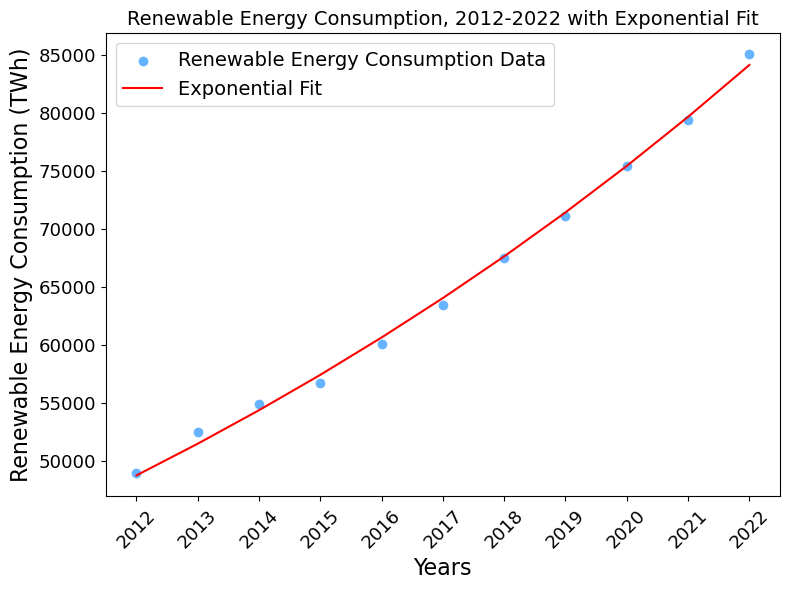

In [27]:
def fit_and_plot_exponential_growth(renewable_energy):
    """
    Filters data for specific years, fits an exponential growth model to the renewable energy consumption data, and plots it.
    """
    filtered_data = renewable_energy[(renewable_energy['year'] >= 2012) & (renewable_energy['year'] <= 2022)]

    # Calculate the numeric index based on years for the renewable energy data
    numeric_index = (filtered_data['year'] - 2012).values

    # Fit the exponential curve to the renewable energy consumption data
    initial_guesses = (1e6, 0.05)
    p, cov = curve_fit(exponential, numeric_index, filtered_data['total_renewable_consumption'], p0=initial_guesses)

    # Calculate the standard deviations for parameters
    sigma = np.sqrt(np.diag(cov))

    # Print the parameter values and their uncertainties
    print(f"N0 = {p[0]:g} +/- {sigma[0]:g}")
    print(f"growth = {p[1]:.2f} +/- {sigma[1]:.2f}")

    # Plotting the renewable energy consumption data and the exponential fit as a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(filtered_data['year'], filtered_data['total_renewable_consumption'], color='#66b3ff', label='Renewable Energy Consumption Data')
    plt.plot(filtered_data['year'], exponential(numeric_index, *p), color='red', label='Exponential Fit')
    plt.title('Renewable Energy Consumption, 2012-2022 with Exponential Fit', fontsize=14)
    plt.xlabel('Years', fontsize=16)
    plt.ylabel('Renewable Energy Consumption (TWh)', fontsize=16)
    plt.xticks(filtered_data['year'], rotation=45, fontsize=13)
    plt.yticks(fontsize=13)
    plt.legend(fontsize= 14)
    plt.tight_layout()
    plt.show()
fit_and_plot_exponential_growth(renewable_energy)


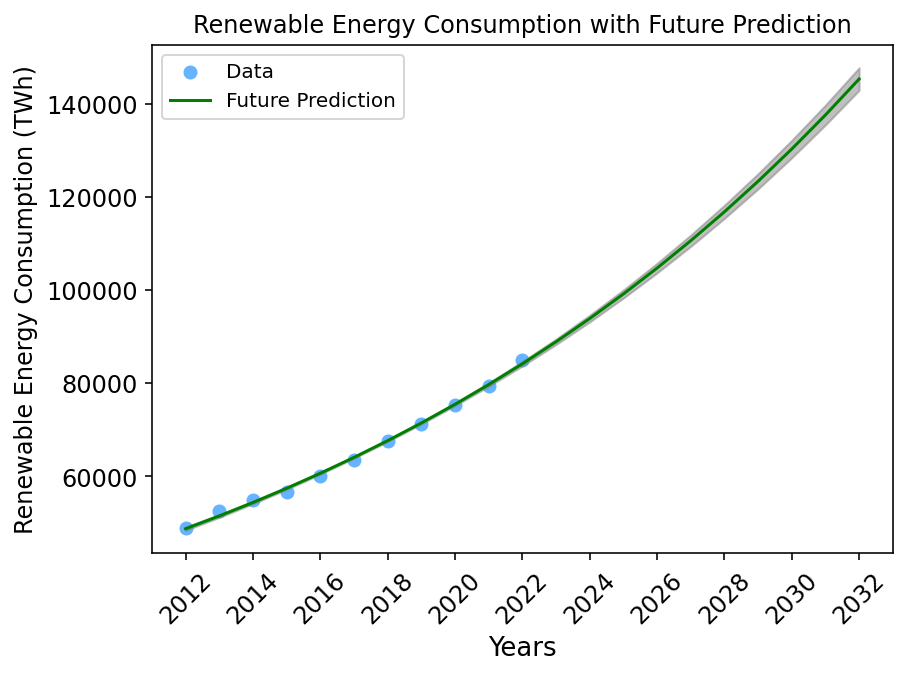

In [28]:
def predict_and_plot_renewable_energy(data, start_year, end_year, future_end_year):
    """
    Fits an exponential growth model to renewable energy consumption data,
    performs predictions, and estimates uncertainties using bootstrapping.
    """
    # Filtering the dataset for the specified years
    filtered_data = data[(data['year'] >= start_year) & (data['year'] <= end_year)]
    numeric_index = (filtered_data['year'] - start_year).values

    # Fit the exponential curve to the renewable energy consumption data
    initial_guesses = (1e6, 0.05)
    p, cov = curve_fit(exponential, numeric_index, filtered_data['total_renewable_consumption'], p0=initial_guesses)

    # Create a subplot
    fig, ax = plt.subplots(dpi=144)

    # Create array of values within data, and beyond
    time_predictions = np.arange(start_year, future_end_year + 1)

    # Determine predictions for each of those times
    renewable_predictions = exponential(time_predictions - start_year, *p)

    # Perform bootstrapping to estimate uncertainties
    num_bootstraps = 1000  # Number of bootstrap samples
    bootstrap_predictions = []
    for _ in range(num_bootstraps):
        # Generate bootstrap sample indices
        bootstrap_indices = np.random.choice(len(filtered_data), size=len(filtered_data), replace=True)
        # Fit exponential function to bootstrap sample
        bootstrap_p, _ = curve_fit(exponential, numeric_index[bootstrap_indices], filtered_data['total_renewable_consumption'].iloc[bootstrap_indices], p0=initial_guesses)
        # Predict renewable energy consumption using bootstrap parameters
        bootstrap_predictions.append(exponential(time_predictions - start_year, *bootstrap_p))

    # Calculate uncertainties from bootstrapped predictions
    renewable_uncertainties = np.std(bootstrap_predictions, axis=0)

    # Plotting the renewable energy consumption data, the exponential fit, and the future predictions
    ax.scatter(filtered_data['year'], filtered_data['total_renewable_consumption'], color='#66b3ff', label='Data')
    ax.plot(time_predictions, renewable_predictions, 'g-', label='Future Prediction')
    ax.fill_between(time_predictions, renewable_predictions - renewable_uncertainties, renewable_predictions + renewable_uncertainties, color='gray', alpha=0.5)

    ax.set_title('Renewable Energy Consumption with Future Prediction', fontsize=12)
    plt.xlabel('Years', fontsize=13)
    plt.ylabel('Renewable Energy Consumption (TWh)', fontsize=12)
    plt.xticks(np.arange(start_year, future_end_year + 2, step=2), rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    ax.legend()
    plt.tight_layout()
    plt.show()

predict_and_plot_renewable_energy(renewable_energy, 2012, 2022, 2032)


c:\Users\UK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\UK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\UK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\UK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

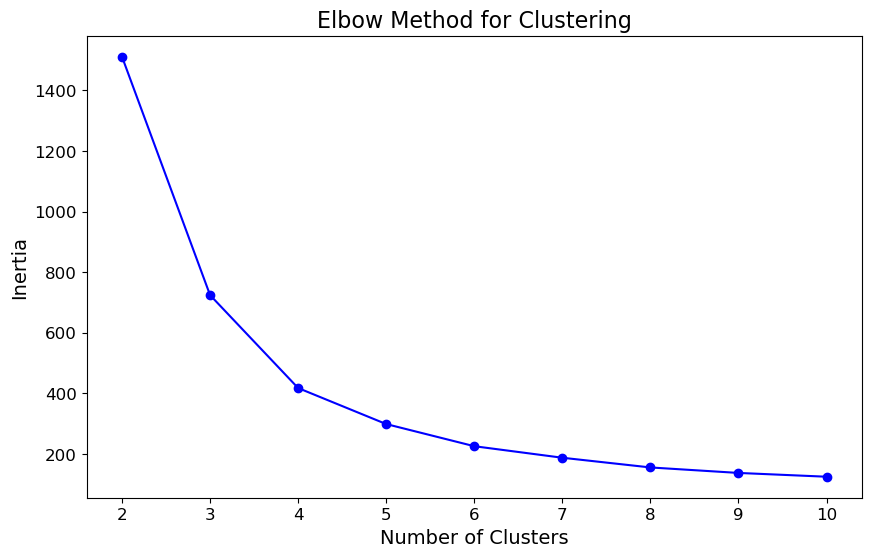

In [29]:
def determine_optimal_clusters(data, features, k_range):
    """
    Scales the specified features of the data, applies k-means clustering for a range of cluster counts,
    and plots the inertia to determine the optimal number of clusters using the elbow method.
    """
    # Scale the data
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(data[features])

    # Determine the optimal number of clusters using the elbow method
    inertia = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(features_scaled)
        inertia.append(kmeans.inertia_)

    # Plot the elbow plot
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertia, 'bo-')
    plt.xlabel('Number of Clusters', fontsize=14)
    plt.ylabel('Inertia', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title('Elbow Method for Clustering', fontsize=16)
    plt.show()

determine_optimal_clusters(df, ['solar_consumption', 'wind_consumption'], range(2, 11))



In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Scale the features
scaler = StandardScaler()
features = ['solar_consumption', 'wind_consumption']  # replace with your actual feature names if different
features_scaled = scaler.fit_transform(df[features])

def find_optimal_clusters(data_scaled):
    """Determines the optimal number of clusters for KMeans clustering using silhouette scores."""
    optimal_k = 2
    highest_score = 0

    print("Silhouette Scores:")
    for k in range(2, 11):  # Test clusters from 2 to 10
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data_scaled)
        score = silhouette_score(data_scaled, kmeans.labels_)
        
        if score > highest_score:
            highest_score = score
            optimal_k = k

        print(f"For {k} clusters: Silhouette score = {score:.5f}")
        if k == optimal_k:
            print(f"Optimal number of clusters so far: {k}\n")

    print(f"Overall optimal number of clusters: {optimal_k}")
    return optimal_k

# Call the function to find the optimal number of clusters
optimal_k = find_optimal_clusters(features_scaled)


Silhouette Scores:


c:\Users\UK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For 2 clusters: Silhouette score = 0.95554
Optimal number of clusters so far: 2



c:\Users\UK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For 3 clusters: Silhouette score = 0.93931


c:\Users\UK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For 4 clusters: Silhouette score = 0.93192


c:\Users\UK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For 5 clusters: Silhouette score = 0.90930


c:\Users\UK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For 6 clusters: Silhouette score = 0.89578


c:\Users\UK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For 7 clusters: Silhouette score = 0.87800


c:\Users\UK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For 8 clusters: Silhouette score = 0.87307


c:\Users\UK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For 9 clusters: Silhouette score = 0.84455


c:\Users\UK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For 10 clusters: Silhouette score = 0.83066
Overall optimal number of clusters: 2


In [37]:
def plot_clusters(df, features, n_clusters=3):
    """
    Scales the specified features, applies KMeans clustering, and plots the results with centroids.
    """
    # Assuming that 'data' is your DataFrame and it already contains the scaled features 'solar_consumption' and 'wind_consumption'
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    kmeans.fit(df[['solar_consumption', 'wind_consumption']])

    # Assign the labels to a new column in your DataFrame
    df['cluster'] = kmeans.labels_

    # Plotting the clusters
    plt.figure(figsize=(10, 8))
    for cluster in sorted(df['cluster'].unique()):
        clustered_df = df[df['cluster'] == cluster]
        plt.scatter(clustered_df['solar_consumption'], clustered_df['wind_consumption'], label=f'Cluster {cluster}')

    # Plotting the centroids
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x', label='Centroids')

    plt.title('Cluster Plot for Solar and Wind Consumption', fontsize=18)
    plt.xlabel('Scaled Solar Consumption', fontsize=16)
    plt.ylabel('Scaled Wind Consumption', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend()
    plt.show()


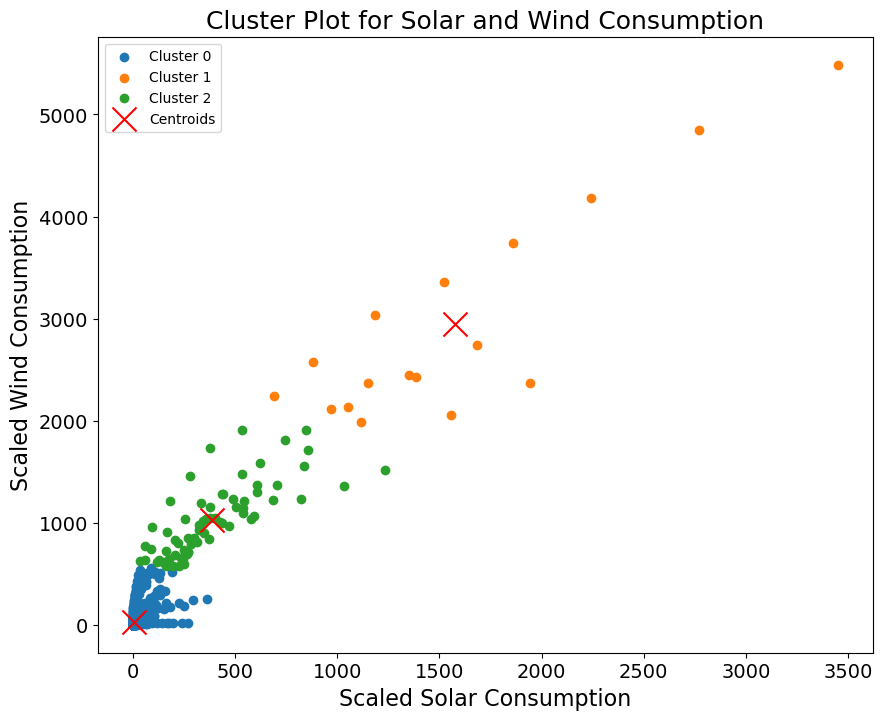

In [38]:
 plot_clusters(df, ['solar_consumption', 'wind_consumption'], n_clusters=3)